<a href="https://colab.research.google.com/github/SianC7/LAIDS/blob/main/PCA_CNN_Experiment_3_Generalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load in pre-made datasets
(Already normalised)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#File Paths

In [ ]:
save_path = "/Users/siancaine/Library/Mobile Documents/com~apple~CloudDocs/Honours project"
dataset_path =  "/Users/siancaine/Library/Mobile Documents/com~apple~CloudDocs/Honours project/Datasets"

#Imports

In [ ]:

# import os
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import load_model
# import pandas as pd
# import numpy as np
# import pandas as pd
# import os
# import tensorflow as tf

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.callbacks import EarlyStopping

# import matplotlib.pyplot as plt

# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# import seaborn as sns # Import seaborn for heatmap plotting
# import numpy as np
# import matplotlib.pyplot as plt

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Input,GlobalAveragePooling1D

# import matplotlib.pyplot as plt
# import timeit
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.utils import class_weight


# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# import seaborn as sns # Import seaborn for heatmap plotting
# import numpy as np # Import numpy
# import matplotlib.pyplot as plt # Import matplotlib for plotting

# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# import numpy as np

# Import statements

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.utils import class_weight
from sklearn.decomposition import PCA
import seaborn as sns
import timeit


#Loads Datasets

In [ ]:
#Encoding map
attack_type_map = {'Normal Traffic': 0, 'Port Scanning': 1, 'Web Attacks': 2, 'Brute Force': 3, 'DDoS': 4, 'Bots': 5, 'DoS': 6} # Create a mapping from attack type to integer label

# Training sets
X_train = pd.read_csv(os.path.join(dataset_path, "adasyn_pca_cnn_X_train.csv")).to_numpy()
y_train = pd.read_csv(os.path.join(dataset_path, "adasyn_pca_cnn_y_train.csv")).to_numpy().ravel()

# Validation sets
X_val = pd.read_csv(os.path.join(dataset_path, "pca_cnn_X_val.csv")).to_numpy()
y_val = pd.read_csv(os.path.join(dataset_path, "pca_cnn_y_val.csv")).to_numpy().ravel()

# Test sets
X_test = pd.read_csv(os.path.join(dataset_path, "pca_cnn_X_test.csv")).to_numpy()
y_test = pd.read_csv(os.path.join(dataset_path, "pca_cnn_y_test.csv")).to_numpy().ravel()

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val   = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# --- Check dataset shapes ---
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:",   X_val.shape,   "y_val:",   y_val.shape)
print("X_test:",  X_test.shape,  "y_test:",  y_test.shape)

def print_class_distribution(label, name=""):
    classes, counts = np.unique(label, return_counts=True)
    print(f"\n{name} set class distribution:")
    for c, num in zip(classes, counts):
        print(f"  Class {c}: {num}")
    print(f"  Total: {len(label)}")

# Print distributions
print_class_distribution(y_train, "Training")
print_class_distribution(y_val, "Validation")
print_class_distribution(y_test, "Test")



X_train: (2051488, 21, 1) y_train: (2051488,)
X_val: (107651, 21, 1) y_val: (107651,)
X_test: (294645, 21, 1) y_test: (294645,)

Training set class distribution:
  Class 0: 320544
  Class 1: 289303
  Class 2: 288453
  Class 3: 288508
  Class 4: 288229
  Class 5: 288395
  Class 6: 288056
  Total: 2051488

Validation set class distribution:
  Class 0: 56567
  Class 1: 10883
  Class 2: 257
  Class 3: 1098
  Class 4: 15362
  Class 5: 234
  Class 6: 23250
  Total: 107651

Test set class distribution:
  Class 0: 209506
  Class 1: 18139
  Class 2: 429
  Class 3: 1830
  Class 4: 25603
  Class 5: 389
  Class 6: 38749
  Total: 294645


#Reshape for CNN


#Plot PCA graphs for visualisation

In [ ]:

# # Reduce dimensionality to 2D
# pca = PCA(n_components=2)
# X_test_pca = pca.fit_transform(X_test)

# reverse_attack_type_map = {v: k for k, v in attack_type_map.items()} # Assuming attack_type_map is defined

# # Loop over each attack type
# for attack_label, attack_name in reverse_attack_type_map.items():
#     # Mask for benign traffic
#     mask_benign = y_test == 0
#     # Mask for current attack
#     mask_attack = y_test == attack_label

#     # Plot
#     plt.figure(figsize=(6,5))
#     plt.scatter(X_test_pca[mask_benign, 0], X_test_pca[mask_benign, 1],
#                 alpha=0.3, label="Normal Traffic", color="blue")
#     plt.scatter(X_test_pca[mask_attack, 0], X_test_pca[mask_attack, 1],
#                 alpha=0.5, label=attack_name, color="red")
#     plt.title(f"PCA: {attack_name} vs Normal Traffic")
#     plt.xlabel("PC 1")
#     plt.ylabel("PC 2")
#     plt.legend()
#     plt.tight_layout()
#     plt.show()


#Remove Class Function

In [ ]:
def Remove_attack_type(attack_type):
    global X_train, y_train
    global X_val, y_val

    # Filter training set
    mask_train = (y_train != attack_type)
    X_train_filtered = X_train[mask_train]
    y_train_filtered = y_train[mask_train]

    # Filter validation set
    mask_val = (y_val != attack_type)
    X_val_filtered = X_val[mask_val]
    y_val_filtered = y_val[mask_val]

    # Print filtered class distributions
    def print_dist(y, name=""):
        classes, counts = np.unique(y, return_counts=True)
        print(f"\n{name} set class distribution:")
        for c, num in zip(classes, counts):
            print(f"  Class {c}: {num}")
        print(f"  Total: {len(y)}")

    print_dist(y_train_filtered, "Filtered Training")
    print_dist(y_val_filtered, "Filtered Validation")

    return X_train_filtered, y_train_filtered, X_val_filtered, y_val_filtered


# Build MLP Model Function

In [ ]:
def build_pca_cnn():
      global X_train, y_train
      # Define input shape
      input_shape = (X_train.shape[1],1)  # (timesteps, features)
      num_classes = len(np.unique(y_train))

      # Build model
      model = Sequential([
      Input(shape=input_shape),

      Conv1D(filters=32, kernel_size=2, activation='relu'), # Detect patterns in the network traffic data
      BatchNormalization(), # Normalizes the outputs of a the Conv1D layer before passing them to the MaxPool layer
      MaxPooling1D(pool_size=2), # Reduce the dimensions of the data without affecting key features

      Conv1D(filters=16, kernel_size=3, activation='relu'),
      BatchNormalization(),
      MaxPooling1D(pool_size=2),

      GlobalAveragePooling1D(),
      Dense(64, activation='relu'),
      Dropout(0.3), # Randomly drop 30% of the network's neurons to further prevent overfitting
      Dense(num_classes, activation='softmax')  # Final output layer for multiclass classification
      ])

      # Compile
      model.compile( optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

      # Summary
      model.summary()

      return model

# Train CNN Function

In [ ]:
# --- Train the MLP Classifer Model ---

def train_pca_cnn(model, new_X_train, new_y_train, new_X_val, new_y_val, unseen_attack): # Train the model

  # # --- Class weights ---
  # classes = np.unique(new_y_train)
  # for c in classes:# Sanity check
  #   print(f"Class {c}: train={np.sum(new_y_train==c)}, val={np.sum(new_y_val==c)}")
  # train_cnt = np.array([np.sum(new_y_train == c) for c in classes], dtype=float)
  # eval_cnt  = np.array([np.sum(new_y_val == c) for c in classes], dtype=float)

  # pi_train = train_cnt / train_cnt.sum()
  # pi_eval   = eval_cnt / eval_cnt.sum()

  # # weights proportional to pi_eval / pi_train (normalized)
  # w = (pi_eval / pi_train)
  # w = w * (len(w) / w.sum())  # normalize for stability
  # class_weights = {i: float(wi) for i, wi in enumerate(w)}

  # Only keep classes that are not the unseen attack
  classes = np.unique(new_y_train)
  classes = [c for c in classes if c != unseen_attack]

  # Sanity check
  for c in classes:
      print(f"Class {c}: train={np.sum(new_y_train==c)}, val={np.sum(new_y_val==c)}")
  train_cnt = np.array([np.sum(new_y_train == c) for c in classes], dtype=float)
  eval_cnt  = np.array([np.sum(new_y_val == c) for c in classes], dtype=float)

  pi_train = train_cnt / train_cnt.sum()
  pi_eval  = eval_cnt / eval_cnt.sum()

  # weights proportional to pi_eval / pi_train (normalized)
  w = (pi_eval / pi_train)
  w = w * (len(w) / w.sum())  # normalize for stability

  class_weights = {c: float(wi) for c, wi in zip(classes, w)}# Build mapping only for included classes
  print("\nFinal class weights:", class_weights)

  # --- Early-stopping ---
  #Early-stopping is a regularisation technique that prevents overfitting by stopping the training process when the model’s performance on the validation dataset starts degrading
  # Stopping early reduces training time and computational costs

  early_stopping = EarlyStopping(monitor='val_loss', # Specify monitor='val_loss' to track the validation loss.
                                patience=4, #the number of epochs to wait for an improvement
                                restore_best_weights=True) # Revert the model to its state where it outputted the lowest validation loss



  # Train the model with early stopping
  history = model.fit(
      new_X_train, new_y_train,
      epochs=20,
      batch_size=64,
      validation_data=(new_X_val, new_y_val),
      callbacks=[early_stopping],
      #class_weight=class_weights,
      verbose=1
  )


  # Plot Accuracy and Loss
  plt.figure(figsize=(12,5))

  # Accuracy plot
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Train Acc')
  plt.plot(history.history['val_accuracy'], label='Val Acc')
  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  # Loss plot
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Val Loss')
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.tight_layout()
  plt.show()



  return model # Return the trained model

# Test the models on the test dataset

In [ ]:

def test_models(model):
    global X_test,y_test
    # Get models predictions of x_test dataset
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)# For multiclass classification, the prediction is the class with the highest probability

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    reverse_attack_type_map = {v: k for k, v in attack_type_map.items()}
    labels = [reverse_attack_type_map.get(i, f'Unknown {i}') for i in range(cm.shape[0])]

    plt.figure(figsize=(8, 4)) # Create confusion matrix plot
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"FP32 PCA-CNN - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Print accuracy & classification report
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=labels))

    # Calculate malware vs benign sample metrics
    normal_traffic = attack_type_map.get('Normal Traffic', None)


    if normal_traffic is not None:

        total_benign = np.sum(cm[normal_traffic, :])
        benign_identified_correctly = cm[normal_traffic, normal_traffic] #TN
        benign_misclassified =  total_benign - benign_identified_correctly #FP

        tn = benign_identified_correctly
        fp = benign_misclassified

        total_malware = len(X_test) - total_benign
        print(f"Total Mal: {len(X_test) - total_benign} & {np.sum(cm) - np.sum(cm[normal_traffic, :])}")

        # Count all malware samples correctly identified (diagonal elements excluding normal traffic)
        malware_identified_correctly = np.sum(np.diag(cm)) - cm[normal_traffic, normal_traffic]

        # Count all the malware samples identified even if misclassified as the wrong type of malware
        total_malware_identified = 0
        for i in range(len(labels)):
            if i != normal_traffic:  # skip the normal traffic row in the cm
                # for a row/class in the cm, count the samples from malware class that were predicted as ANY malware type (not benign)
                malware_predicted_as_any_malware = np.sum(cm[i, :]) - cm[i, 0] # Count all the samples in the row, minus the column of samples predicted as normal traffic
                total_malware_identified += malware_predicted_as_any_malware

        malware_misclassified = total_malware - total_malware_identified

        fn = malware_misclassified
        tp = total_malware_identified

        print(f"Total Malware Samples: {total_malware}")
        print(f"Total Benign Samples: {total_benign}")

        # --- Calculate and print TP, TN, FP, FN for Malware vs Benign ---
        # TP: Malware identified as ANY malware type (total_malware_identified_as_malware)
        # TN: Benign correctly predicted as Benign (cm[normal_traffic_label, normal_traffic_label])
        # FP: Benign incorrectly predicted as Malware (benign_misclassified_as_malware_count)
        # FN: Malware incorrectly predicted as Benign (Total Malware Samples - Malware Identified as Any Malware)

        print("\nTP, TN, FP, FN for Malware vs Benign:")

        print(f"True Positives (Malware predicted as ANY malware): {tp} ({(total_malware_identified/total_malware)*100:.2f}% of Malware Identified)")
        print(f"True Negatives (Benign predicted as Benign): {tn} ({(benign_identified_correctly/total_benign)*100:.2f}% of Benign Identified)")
        print(f"False Positives (Benign predicted as Malware): {fp} ({(benign_misclassified/total_benign)*100:.2f}% of Benign Misclassified)")
        print(f"False Negatives (Malware predicted as Benign): {fn} ({(malware_misclassified/total_malware)*100:.2f}% of Malware Misclassified)")

        print("\nPercentage of each Malware Class Correctly Identified:")
        for i, label in enumerate(labels):
            if i != normal_traffic: # Exclude 'Normal Traffic'
                correctly_identified = cm[i, i]
                total_in_class = np.sum(cm[i, :])
                percentage_identified = (correctly_identified / total_in_class) * 100 if total_in_class > 0 else 0
                print(f"{label}: {percentage_identified:.2f}%")

        # ---- Performance Metrics ---
        #Accuracy
        accuracy = (tp + tn)/(tp + tn + fp + fn)
        # Precision (for malware class)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        # Recall / Sensitivity (for malware class)
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        # F1-Score
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        # False Positive Rate (FPR)
        fpr = (fp / (fp + tn))*100 if (fp + tn) > 0 else 0
        # False Negative Rate (FNR)
        fnr = (fn / (fn + tp))*100 if (fn + tp) > 0 else 0

        print("\n--- Malware vs Benign Performance Metrics ---")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision (Malware): {precision:.4f}")
        print(f"Recall / Sensitivity (Malware): {recall:.4f}")
        print(f"F1-Score (Malware): {f1_score:.4f}")
        print(f"False Positive Rate (Benign misclassified): {fpr:.2f}%")
        print(f"False Negative Rate (Malware missed): {fnr:.2f}%")




#Quant Models

In [ ]:


def make_representative_dataset_gen(new_X_train, new_y_train):
    if len(new_X_train) == 0:
        raise ValueError("Representative dataset is empty! Cannot quantize full INT8.")
    def representative_dataset_gen():
        # Get class distribution
        class_types = np.unique(new_y_train)
        class_indices = [np.where(new_y_train == c)[0] for c in class_types]

        rng = np.random.default_rng(seed=1)
        selected_indices = []
        for indices in class_indices:
            selected_indices.extend(rng.choice(indices, 50, replace=False))

        rng.shuffle(selected_indices)

        for i in selected_indices:
            yield [np.expand_dims(new_X_train[i].astype(np.float32), 0)]

    return representative_dataset_gen


def quant_models(cnn_model, new_y_train, new_X_train):
    # --- Float32 baseline (no quantization) ---
    converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
    quantModel_f32 = converter.convert()

    # --- Weight-only quantization (int8 weights, float32 activations) ---
    converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]  # triggers int8 weight quantization
    quantModel_int8_weights = converter.convert()

    # --- Weight-only quantization (float16 weights, float32 activations) ---
    converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    converter.target_spec.supported_types = [tf.float16]  # store weights as float16
    quantModel_fp16_weights = converter.convert()

    # --- Full Integer Model Quantization ---
    converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT] # Apply default optimizations (int8)
    converter.representative_dataset = make_representative_dataset_gen(new_X_train, new_y_train) # Provide the representative dataset and ensure input dtype is float32
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    # Set the input and output types to int8 for inference
    converter.inference_input_type = tf.int8
    converter.inference_output_type = tf.int8
    quantModel_full_int8 = converter.convert() # Convert the model

    print("Quant Models Ready!")

    return (
        quantModel_f32, quantModel_int8_weights, quantModel_fp16_weights, quantModel_full_int8
    )


#Evaluate Quant Models

In [ ]:
    # --- Evaluate all AE → MLP TFLite models ---
def evaluate_weight_quant_model(tflite_weight_models):
    global X_test, y_test
    # --- Evaluate Quant Models ---

    # Evaluate the models
    for m in tflite_weight_models:

        the_model = m["model"]
        model_name = m["name"]
        print(f"\n --- Evaluating: {model_name} ---")


        # Load the TFLite model and get it ready to make predictions
        interpreter = tf.lite.Interpreter(model_content=the_model) # Create interpreter object that will read and run the TFLite model
        interpreter.allocate_tensors() # Make the interpreter allocate memory
        input_details = interpreter.get_input_details() # Get expected shape and data type of the data the model needs to evaluate
        output_details = interpreter.get_output_details() #Sshape and data type the model will need to produce the results in


        # Get model predictions for test sample
        y_pred_probs = []

        for i in range(len(X_test)): # Interpreter object does not have a built-in .evaluate() method like the Keras Model object does, therefore need to go through every sample manually
            input_data = np.expand_dims(X_test[i], axis=0).astype(input_details[0]['dtype']) # shape the input sample: (1, num_features, 1)
            interpreter.set_tensor(input_details[0]['index'], input_data) #Feed a single sample of input data into the TFLite interpreter
            interpreter.invoke() # Tell the interpreter to run the model on the input data
            output_data = interpreter.get_tensor(output_details[0]['index']) # Get the output from the model
            y_pred_probs.append(output_data[0]) # Add the raw output to the list

        y_pred_probs = np.array(y_pred_probs) # Convert the list to a single NumPy array
        y_pred = np.argmax(y_pred_probs, axis=1) # Get the predicted class label for each sample



        # --- Confusion Matrix ---
        cm = confusion_matrix(y_test, y_pred)
        reverse_attack_type_map = {v: k for k, v in attack_type_map.items()}
        labels = [reverse_attack_type_map.get(i, f'Unknown {i}') for i in range(cm.shape[0])]

        plt.figure(figsize=(8, 4)) # Create confusion matrix plot
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
        plt.title(f"{model_name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

        # Print accuracy & classification report
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_pred, target_names=labels))

        # Calculate malware vs benign sample metrics
        normal_traffic = attack_type_map.get('Normal Traffic', None)


        if normal_traffic is not None:

            total_benign = np.sum(cm[normal_traffic, :])
            benign_identified_correctly = cm[normal_traffic, normal_traffic] #TN
            benign_misclassified =  total_benign - benign_identified_correctly #FP

            tn = benign_identified_correctly
            fp = benign_misclassified

            total_malware = len(X_test) - total_benign
            print(f"Total Mal: {len(X_test) - total_benign} & {np.sum(cm) - np.sum(cm[normal_traffic, :])}")

            # Count all malware samples correctly identified (diagonal elements excluding normal traffic)
            malware_identified_correctly = np.sum(np.diag(cm)) - cm[normal_traffic, normal_traffic]

            # Count all the malware samples identified even if misclassified as the wrong type of malware
            total_malware_identified = 0
            for i in range(len(labels)):
                if i != normal_traffic:  # skip the normal traffic row in the cm
                    # for a row/class in the cm, count the samples from malware class that were predicted as ANY malware type (not benign)
                    malware_predicted_as_any_malware = np.sum(cm[i, :]) - cm[i, 0] # Count all the samples in the row, minus the column of samples predicted as normal traffic
                    total_malware_identified += malware_predicted_as_any_malware

            malware_misclassified = total_malware - total_malware_identified

            fn = malware_misclassified
            tp = total_malware_identified

            print(f"Total Malware Samples: {total_malware}")
            print(f"Total Benign Samples: {total_benign}")

            # --- Calculate and print TP, TN, FP, FN for Malware vs Benign ---
            # TP: Malware identified as ANY malware type (total_malware_identified_as_malware)
            # TN: Benign correctly predicted as Benign (cm[normal_traffic_label, normal_traffic_label])
            # FP: Benign incorrectly predicted as Malware (benign_misclassified_as_malware_count)
            # FN: Malware incorrectly predicted as Benign (Total Malware Samples - Malware Identified as Any Malware)

            print(f"True Positives (Malware predicted as ANY malware): {tp} ({(total_malware_identified/total_malware)*100:.2f}% of Malware Identified)")
            print(f"True Negatives (Benign predicted as Benign): {tn} ({(benign_identified_correctly/total_benign)*100:.2f}% of Benign Identified)")
            print(f"False Positives (Benign predicted as Malware): {fp} ({(benign_misclassified/total_benign)*100:.2f}% of Benign Misclassified)")
            print(f"False Negatives (Malware predicted as Benign): {fn} ({(malware_misclassified/total_malware)*100:.2f}% of Malware Misclassified)")

            print("\nPercentage of each Malware Class Correctly Identified:")
            for i, label in enumerate(labels):
                if i != normal_traffic: # Exclude 'Normal Traffic'
                    correctly_identified = cm[i, i]
                    total_in_class = np.sum(cm[i, :])
                    percentage_identified = (correctly_identified / total_in_class) * 100 if total_in_class > 0 else 0
                    print(f"{label}: {percentage_identified:.2f}%")

            # ---- Performance Metrics ---
            #Accuracy
            accuracy = (tp + tn)/(tp + tn + fp + fn)
            # Precision (for malware class)
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            # Recall / Sensitivity (for malware class)
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            # F1-Score
            f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            # False Positive Rate (FPR)
            fpr = (fp / (fp + tn))*100 if (fp + tn) > 0 else 0
            # False Negative Rate (FNR)
            fnr = (fn / (fn + tp))*100 if (fn + tp) > 0 else 0

            print("\n--- Malware vs Benign Performance Metrics ---")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision (Malware): {precision:.4f}")
            print(f"Recall / Sensitivity (Malware): {recall:.4f}")
            print(f"F1-Score (Malware): {f1_score:.4f}")
            print(f"False Positive Rate (Benign misclassified): {fpr:.2f}%")
            print(f"False Negative Rate (Malware missed): {fnr:.2f}%")





In [ ]:
def evaluate_full_int8_quant_model(tflite_full_int_models):
    global X_test, y_test

    # --- Evaluate all models with metrics + resource tracking ---
    for m in tflite_full_int_models:
        the_model = m["model"]
        model_name = m["name"]
        print(f"\n--- Evaluating: {model_name} ---")

        #

        interpreter = tf.lite.Interpreter(model_content=the_model)
        interpreter.allocate_tensors()
        input_details = interpreter.get_input_details()[0]
        output_details = interpreter.get_output_details()[0]

        in_scale,  in_zp  = input_details['quantization']
        out_scale, out_zp = output_details['quantization']


        # Predictions
        y_pred_probs = []
        for i in range(len(X_test)):
            sample_input = np.expand_dims(X_test[i], axis=0).astype(input_details['dtype'])

            # Quantize input correctly for int8 models
            if input_details['dtype'] == np.int8:
                quant_sample_input = np.round(sample_input / in_scale + in_zp).astype(np.int8)
            else:
                quant_sample_input = sample_input.astype(input_details['dtype'])

            interpreter.set_tensor(input_details['index'], quant_sample_input)
            interpreter.invoke()
            quant_sample_output = interpreter.get_tensor(output_details['index'])

            # Dequantize outputs back to float
            if output_details['dtype'] == np.int8:
                sample_output = (quant_sample_output.astype(np.float32) - out_zp) * out_scale
            else:
                sample_output = quant_sample_output.astype(np.float32)

            y_pred_probs.append(sample_output[0])

        y_pred_probs = np.array(y_pred_probs)
        y_pred = np.argmax(y_pred_probs, axis=1)



        # --- Confusion Matrix ---
        cm = confusion_matrix(y_test, y_pred)
        reverse_attack_type_map = {v: k for k, v in attack_type_map.items()}
        labels = [reverse_attack_type_map.get(i, f'Unknown {i}') for i in range(cm.shape[0])]

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
        plt.title(f"{model_name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

        # Accuracy & classification report
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_pred, target_names=labels))

        # Calculate malware vs benign sample metrics
        normal_traffic = attack_type_map.get('Normal Traffic', None)


        if normal_traffic is not None:

            total_benign = np.sum(cm[normal_traffic, :])
            benign_identified_correctly = cm[normal_traffic, normal_traffic] #TN
            benign_misclassified =  total_benign - benign_identified_correctly #FP

            tn = benign_identified_correctly
            fp = benign_misclassified

            total_malware = len(X_test) - total_benign

            # Count all malware samples correctly identified (diagonal elements excluding normal traffic)
            malware_identified_correctly = np.sum(np.diag(cm)) - cm[normal_traffic, normal_traffic]

            # Count all the malware samples identified even if misclassified as the wrong type of malware
            total_malware_identified = 0
            for i in range(len(labels)):
                if i != normal_traffic:  # skip the normal traffic row in the cm
                    # for a row/class in the cm, count the samples from malware class that were predicted as ANY malware type (not benign)
                    malware_predicted_as_any_malware = np.sum(cm[i, :]) - cm[i, 0] # Count all the samples in the row, minus the column of samples predicted as normal traffic
                    total_malware_identified += malware_predicted_as_any_malware

            malware_misclassified = total_malware - total_malware_identified

            fn = malware_misclassified
            tp = total_malware_identified

            print(f"Total Malware Samples: {total_malware}")
            print(f"Total Benign Samples: {total_benign}")

            # --- Calculate and print TP, TN, FP, FN for Malware vs Benign ---
            # TP: Malware identified as ANY malware type (total_malware_identified_as_malware)
            # TN: Benign correctly predicted as Benign (cm[normal_traffic_label, normal_traffic_label])
            # FP: Benign incorrectly predicted as Malware (benign_misclassified_as_malware_count)
            # FN: Malware incorrectly predicted as Benign (Total Malware Samples - Malware Identified as Any Malware)

            print("\nTP, TN, FP, FN for Malware vs Benign:")

            print(f"True Positives (Malware predicted as ANY malware): {tp} ({(total_malware_identified/total_malware)*100:.2f}% of Malware Identified)")
            print(f"True Negatives (Benign predicted as Benign): {tn} ({(benign_identified_correctly/total_benign)*100:.2f}% of Benign Identified)")
            print(f"False Positives (Benign predicted as Malware): {fp} ({(benign_misclassified/total_benign)*100:.2f}% of Benign Misclassified)")
            print(f"False Negatives (Malware predicted as Benign): {fn} ({(malware_misclassified/total_malware)*100:.2f}% of Malware Misclassified)")

            print("\nPercentage of each Malware Class Correctly Identified:")
            for i, label in enumerate(labels):
                if i != normal_traffic: # Exclude 'Normal Traffic'
                    correctly_identified = cm[i, i]
                    total_in_class = np.sum(cm[i, :])
                    percentage_identified = (correctly_identified / total_in_class) * 100 if total_in_class > 0 else 0
                    print(f"{label}: {percentage_identified:.2f}%")

            # ---- Performance Metrics ---
            #Accuracy
            accuracy = (tp + tn)/(tp + tn + fp + fn)
            # Precision (for malware class)
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            # Recall / Sensitivity (for malware class)
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            # F1-Score
            f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            # False Positive Rate (FPR)
            fpr = (fp / (fp + tn))*100 if (fp + tn) > 0 else 0
            # False Negative Rate (FNR)
            fnr = (fn / (fn + tp))*100 if (fn + tp) > 0 else 0

            print("\n--- Malware vs Benign Performance Metrics ---")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision (Malware): {precision:.4f}")
            print(f"Recall / Sensitivity (Malware): {recall:.4f}")
            print(f"F1-Score (Malware): {f1_score:.4f}")
            print(f"False Positive Rate (Benign misclassified): {fpr:.2f}%")
            print(f"False Negative Rate (Malware missed): {fnr:.2f}%")




#REMOVING DoS


Filtered Training set class distribution:
  Class 0: 320544
  Class 1: 289303
  Class 2: 288453
  Class 3: 288508
  Class 4: 288229
  Class 5: 288395
  Total: 1763432

Filtered Validation set class distribution:
  Class 0: 56567
  Class 1: 10883
  Class 2: 257
  Class 3: 1098
  Class 4: 15362
  Class 5: 234
  Total: 84401


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 20, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 20, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 8, 16)          │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 16)          │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,383 (13.21 KB)

 Trainable params: 3,287 (12.84 KB)

 Non-trainable params: 96 (384.00 B)

Class 0: train=320544, val=56567
Class 1: train=289303, val=10883
Class 2: train=288453, val=257
Class 3: train=288508, val=1098
Class 4: train=288229, val=15362
Class 5: train=288395, val=234

Final class weights: {np.int64(0): 3.8799821469036444, np.int64(1): 0.8270845810522598, np.int64(2): 0.019589001333285314, np.int64(3): 0.0836755763726367, np.int64(4): 1.1718292072591474, np.int64(5): 0.017839487079027067}
Epoch 1/20
27554/27554 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.9025 - loss: 0.2686 - val_accuracy: 0.9188 - val_loss: 0.2468
Epoch 2/20
27554/27554 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.9264 - loss: 0.1886 - val_accuracy: 0.9166 - val_loss: 0.2545
Epoch 3/20
27554/27554 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step - accuracy: 0.9300 - loss: 0.1764 - val_accuracy: 0.9347 - val_loss: 0.1933
Epoch 4/20
27554/27554 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step - accuracy: 0.9322 - loss: 0.1691 - val_accuracy: 0.9380 - val_loss: 0.1784
Epoch 5/20
27554/27554 ━━━━━━━━━━━━━━━━━━━━ 39s 1m

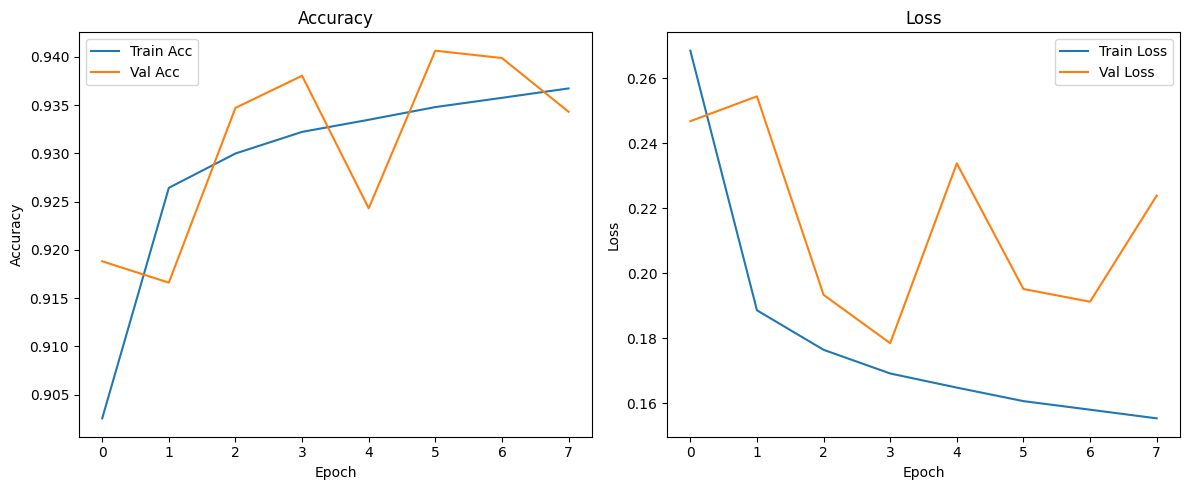

9208/9208 ━━━━━━━━━━━━━━━━━━━━ 4s 387us/step


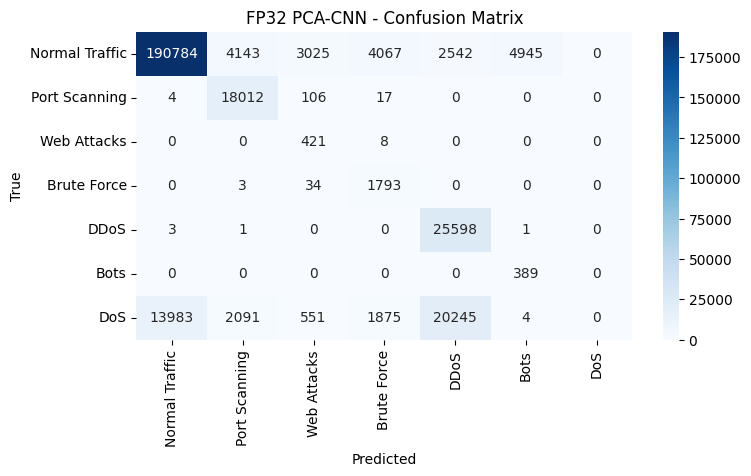

Accuracy: 0.8043476047446928
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       0.93      0.91      0.92    209506
 Port Scanning       0.74      0.99      0.85     18139
   Web Attacks       0.10      0.98      0.18       429
   Brute Force       0.23      0.98      0.37      1830
          DDoS       0.53      1.00      0.69     25603
          Bots       0.07      1.00      0.14       389
           DoS       0.00      0.00      0.00     38749

      accuracy                           0.80    294645
     macro avg       0.37      0.84      0.45    294645
  weighted avg       0.76      0.80      0.77    294645

Total Mal: 85139 & 85139
Total Malware Samples: 85139
Total Benign Samples: 209506

TP, TN, FP, FN for Malware vs Benign:
True Positives (Malware predicted as ANY malware): 71149 (83.57% of Malware Identified)
True Negatives (Benign predicted as Benign): 190784 (91.06% of Benign Identified)
False Positives (Benign predicted as 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [ ]:
# Removing DoS
dos_encoding = 6

# # --- Get filtered datasets ---
X_train_no_DoS, y_train_no_DoS, X_val_no_DoS, y_val_no_DoS = Remove_attack_type(dos_encoding)

# --- Get the pca cnn Model ---
pca_cnn = build_pca_cnn()

# --- Train the MLP on the new datasets ---
pca_cnn = train_pca_cnn(pca_cnn, X_train_no_DoS, y_train_no_DoS, X_val_no_DoS, y_val_no_DoS,unseen_attack=dos_encoding)
#pca_cnn = train_pca_cnn(pca_cnn, X_train, y_train, X_val, y_val)

# --- Test the models ---
test_models(pca_cnn)


INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpnhg8yvh2/assets


INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpnhg8yvh2/assets


Saved artifact at '/var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpnhg8yvh2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  5477822736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477823120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477822160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477823504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477823696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477822928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477824272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477825232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477825040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477824848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477823312: TensorSpec(sha

W0000 00:00:1756648949.912478 3464868 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1756648949.912488 3464868 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-08-31 16:02:29.912827: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpnhg8yvh2
2025-08-31 16:02:29.913396: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-08-31 16:02:29.913401: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpnhg8yvh2
I0000 00:00:1756648949.919160 3464868 mlir_graph_optimization_pass.cc:437] MLIR V1 optimization pass is not enabled
2025-08-31 16:02:29.920105: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-08-31 16:02:29.954935: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder

Saved artifact at '/var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpgwyolwos'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  5477822736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477823120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477822160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477823504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477823696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477822928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477824272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477825232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477825040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477824848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477823312: TensorSpec(sha

W0000 00:00:1756648950.423718 3464868 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1756648950.423727 3464868 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-08-31 16:02:30.423829: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpgwyolwos
2025-08-31 16:02:30.424382: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-08-31 16:02:30.424386: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpgwyolwos
2025-08-31 16:02:30.430646: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-08-31 16:02:30.464606: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpgwyolwos
2025-08-31 16:02:30.475565: I tensorflow/cc/saved_model/loader.cc:

Saved artifact at '/var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpu0er_ah0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  5477822736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477823120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477822160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477823504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477823696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477822928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477824272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477825232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477825040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477824848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477823312: TensorSpec(sha

W0000 00:00:1756648950.839083 3464868 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1756648950.839093 3464868 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-08-31 16:02:30.839203: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpu0er_ah0
2025-08-31 16:02:30.839792: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-08-31 16:02:30.839797: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpu0er_ah0
2025-08-31 16:02:30.845741: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-08-31 16:02:30.877824: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpu0er_ah0
2025-08-31 16:02:30.888188: I tensorflow/cc/saved_model/loader.cc:

Saved artifact at '/var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpr7g1iif1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  5477822736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477823120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477822160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477823504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477823696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477822928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477824272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477825232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477825040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477824848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5477823312: TensorSpec(sha

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tensorflow/lite/python/convert.py:863: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
W0000 00:00:1756648951.235381 3464868 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1756648951.235390 3464868 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-08-31 16:02:31.235501: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpr7g1iif1
2025-08-31 16:02:31.236202: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-08-31 16:02:31.236206: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpr7g1iif1
2025-08-31 16:02:31.242280: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-08-31 16:02:31.

Quant Models Ready!

 --- Evaluating: PCA-CNN Float32 Model ---


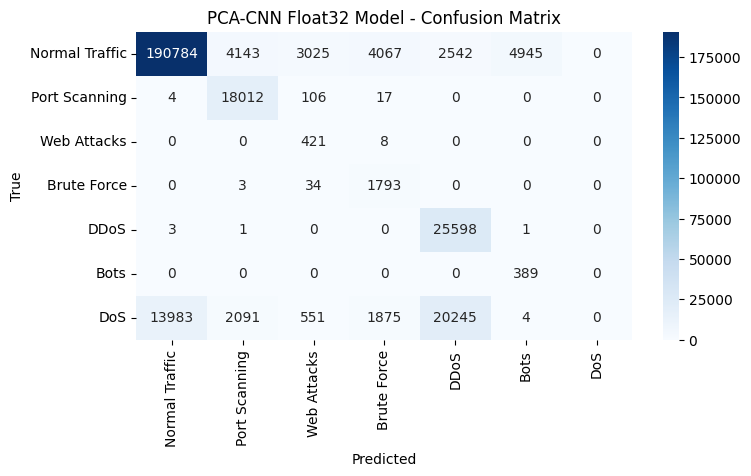

Accuracy: 0.8043476047446928
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       0.93      0.91      0.92    209506
 Port Scanning       0.74      0.99      0.85     18139
   Web Attacks       0.10      0.98      0.18       429
   Brute Force       0.23      0.98      0.37      1830
          DDoS       0.53      1.00      0.69     25603
          Bots       0.07      1.00      0.14       389
           DoS       0.00      0.00      0.00     38749

      accuracy                           0.80    294645
     macro avg       0.37      0.84      0.45    294645
  weighted avg       0.76      0.80      0.77    294645

Total Mal: 85139 & 85139
Total Malware Samples: 85139
Total Benign Samples: 209506
True Positives (Malware predicted as ANY malware): 71149 (83.57% of Malware Identified)
True Negatives (Benign predicted as Benign): 190784 (91.06% of Benign Identified)
False Positives (Benign predicted as Malware): 18722 (8.94% of Benign Miscla

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

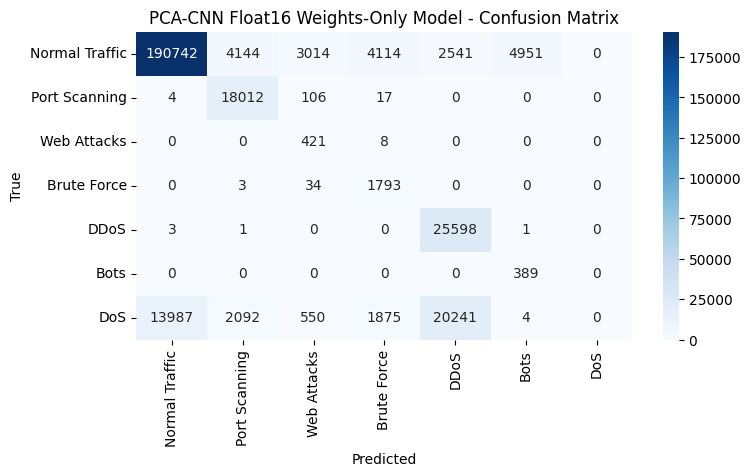

Accuracy: 0.804205060326834
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       0.93      0.91      0.92    209506
 Port Scanning       0.74      0.99      0.85     18139
   Web Attacks       0.10      0.98      0.18       429
   Brute Force       0.23      0.98      0.37      1830
          DDoS       0.53      1.00      0.69     25603
          Bots       0.07      1.00      0.14       389
           DoS       0.00      0.00      0.00     38749

      accuracy                           0.80    294645
     macro avg       0.37      0.84      0.45    294645
  weighted avg       0.76      0.80      0.77    294645

Total Mal: 85139 & 85139
Total Malware Samples: 85139
Total Benign Samples: 209506
True Positives (Malware predicted as ANY malware): 71145 (83.56% of Malware Identified)
True Negatives (Benign predicted as Benign): 190742 (91.04% of Benign Identified)
False Positives (Benign predicted as Malware): 18764 (8.96% of Benign Misclas

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

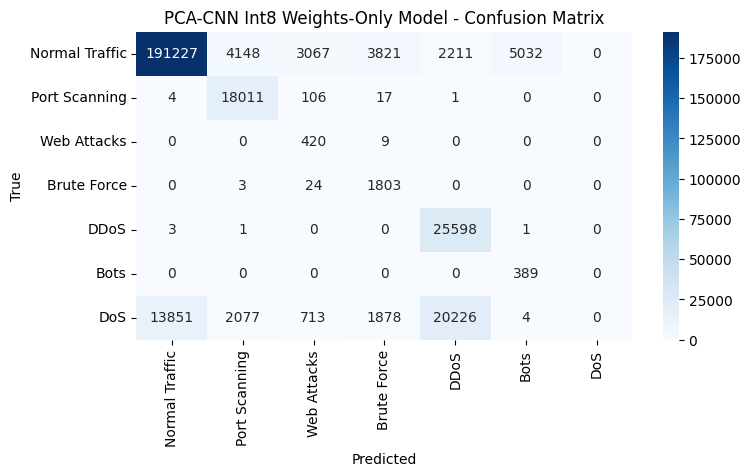

Accuracy: 0.8058782602793192
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       0.93      0.91      0.92    209506
 Port Scanning       0.74      0.99      0.85     18139
   Web Attacks       0.10      0.98      0.18       429
   Brute Force       0.24      0.99      0.39      1830
          DDoS       0.53      1.00      0.70     25603
          Bots       0.07      1.00      0.13       389
           DoS       0.00      0.00      0.00     38749

      accuracy                           0.81    294645
     macro avg       0.37      0.84      0.45    294645
  weighted avg       0.76      0.81      0.77    294645

Total Mal: 85139 & 85139
Total Malware Samples: 85139
Total Benign Samples: 209506
True Positives (Malware predicted as ANY malware): 71281 (83.72% of Malware Identified)
True Negatives (Benign predicted as Benign): 191227 (91.28% of Benign Identified)
False Positives (Benign predicted as Malware): 18279 (8.72% of Benign Miscla

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

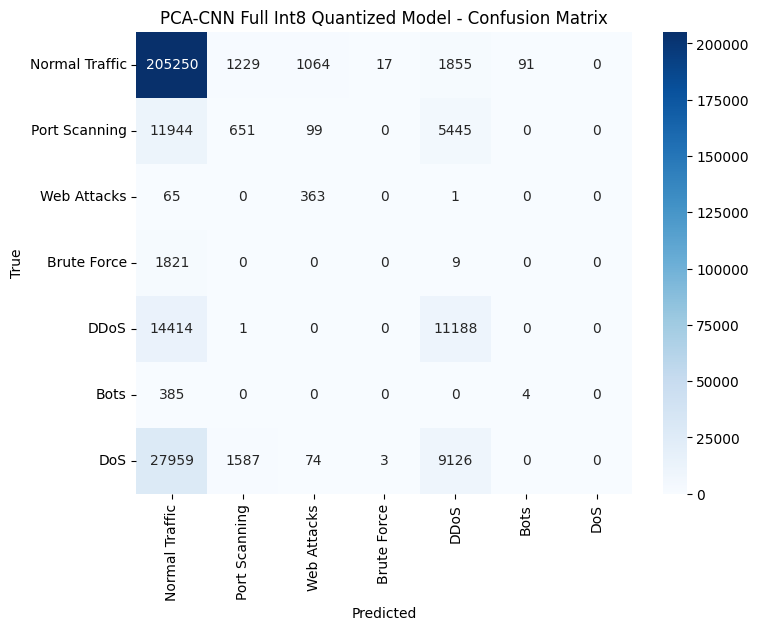

Accuracy: 0.7380271173785403
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       0.78      0.98      0.87    209506
 Port Scanning       0.19      0.04      0.06     18139
   Web Attacks       0.23      0.85      0.36       429
   Brute Force       0.00      0.00      0.00      1830
          DDoS       0.41      0.44      0.42     25603
          Bots       0.04      0.01      0.02       389
           DoS       0.00      0.00      0.00     38749

      accuracy                           0.74    294645
     macro avg       0.24      0.33      0.25    294645
  weighted avg       0.60      0.74      0.66    294645

Total Malware Samples: 85139
Total Benign Samples: 209506

TP, TN, FP, FN for Malware vs Benign:
True Positives (Malware predicted as ANY malware): 28551 (33.53% of Malware Identified)
True Negatives (Benign predicted as Benign): 205250 (97.97% of Benign Identified)
False Positives (Benign predicted as Malware): 4256 (2.03% of 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [ ]:
# Evaluate Quant Models
# -----------------------------------
# --- Make Quant Models -------------
# -----------------------------------
quantModel_f32, quantModel_int8_weights, quantModel_fp16_weights, quantModel_full_int8 = quant_models(pca_cnn, y_train_no_DoS, X_train_no_DoS)
#quantModel_f32, quantModel_int8_weights, quantModel_fp16_weights, quantModel_full_int8 = quant_models(pca_cnn, y_train, X_train)

# List of TFLite models (AE + MLP)
tflite_weight_models = [
    {
        "model": quantModel_f32,
        "name": "PCA-CNN Float32 Model",
    },
    {
        "model": quantModel_fp16_weights,
        "name": "PCA-CNN Float16 Weights-Only Model",
    },
    {
        "model": quantModel_int8_weights,
        "name": "PCA-CNN Int8 Weights-Only Model",
    }
]
# -----------------------------------
# --- evaluate_weight_quant_model ---
# -----------------------------------
evaluate_weight_quant_model(tflite_weight_models)

tflite_full_int_models = [
    {
        "model": quantModel_full_int8,
        "name": "PCA-CNN Full Int8 Quantized Model"
    }
]

# --------------------------------------
# --- evaluate_full_int8_quant_model ---
# --------------------------------------
evaluate_full_int8_quant_model(tflite_full_int_models)


#REMOVING BOTS


Filtered Training set class distribution:
  Class 0: 320544
  Class 1: 289303
  Class 2: 288453
  Class 3: 288508
  Class 4: 288229
  Class 6: 288056
  Total: 1763093

Filtered Validation set class distribution:
  Class 0: 56567
  Class 1: 10883
  Class 2: 257
  Class 3: 1098
  Class 4: 15362
  Class 6: 23250
  Total: 107417


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 20, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 8, 16)          │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 16)          │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,383 (13.21 KB)

 Trainable params: 3,287 (12.84 KB)

 Non-trainable params: 96 (384.00 B)

Class 0: train=320544, val=56567
Class 1: train=289303, val=10883
Class 2: train=288453, val=257
Class 3: train=288508, val=1098
Class 4: train=288229, val=15362
Class 6: train=288056, val=23250

Final class weights: {np.int64(0): 3.0012394292359112, np.int64(1): 0.639765535505891, np.int64(2): 0.01515246229360312, np.int64(3): 0.06472463778577142, np.int64(4): 0.9064320112820754, np.int64(6): 1.3726859238967462}
Epoch 1/20
27549/27549 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - accuracy: 0.8515 - loss: 0.3916 - val_accuracy: 0.9283 - val_loss: 0.4341
Epoch 2/20
27549/27549 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.8872 - loss: 0.2840 - val_accuracy: 0.9243 - val_loss: 0.2998
Epoch 3/20
27549/27549 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.8961 - loss: 0.2616 - val_accuracy: 0.9436 - val_loss: 0.1694
Epoch 4/20
27549/27549 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.9012 - loss: 0.2481 - val_accuracy: 0.9501 - val_loss: 0.1442
Epoch 5/20
27549/27549 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms

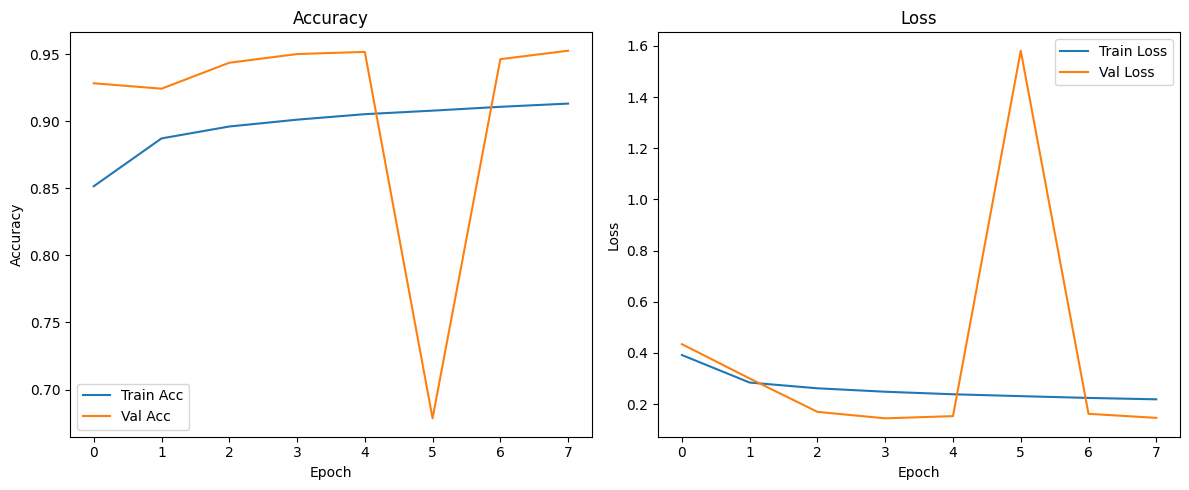

9208/9208 ━━━━━━━━━━━━━━━━━━━━ 4s 453us/step


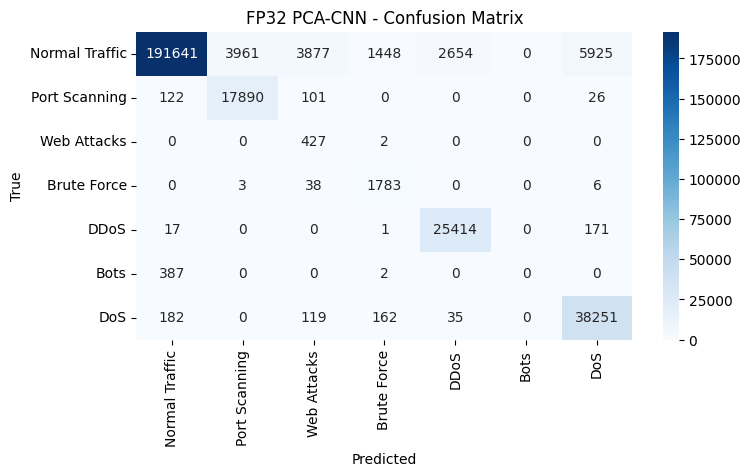

Accuracy: 0.9347044748765464
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       1.00      0.91      0.95    209506
 Port Scanning       0.82      0.99      0.89     18139
   Web Attacks       0.09      1.00      0.17       429
   Brute Force       0.52      0.97      0.68      1830
          DDoS       0.90      0.99      0.95     25603
          Bots       0.00      0.00      0.00       389
           DoS       0.86      0.99      0.92     38749

      accuracy                           0.93    294645
     macro avg       0.60      0.84      0.65    294645
  weighted avg       0.95      0.93      0.94    294645

Total Mal: 85139 & 85139
Total Malware Samples: 85139
Total Benign Samples: 209506

TP, TN, FP, FN for Malware vs Benign:
True Positives (Malware predicted as ANY malware): 84431 (99.17% of Malware Identified)
True Negatives (Benign predicted as Benign): 191641 (91.47% of Benign Identified)
False Positives (Benign predicted as 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [ ]:
# Removing DoS
bots_encoding = 5

# --- Get filtered datasets ---
X_train_no_Bots, y_train_no_Bots, X_val_no_Bots, y_val_no_Bots = Remove_attack_type(bots_encoding)


# --- Get the pca cnn Model ---
pca_cnn = build_pca_cnn()

# --- Train the MLP on the new datasets ---
pca_cnn = train_pca_cnn(pca_cnn, X_train_no_Bots, y_train_no_Bots, X_val_no_Bots, y_val_no_Bots,bots_encoding)

# --- Test the models ---
test_models(pca_cnn)



INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp74_ctkqq/assets


INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp74_ctkqq/assets


Saved artifact at '/var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp74_ctkqq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21, 1), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  14346902928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346905232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346904464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346903888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346904656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346905424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346905616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346906576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346906192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346906000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346904848: 

W0000 00:00:1756652241.334909 3464868 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1756652241.335420 3464868 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-08-31 16:57:21.337501: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp74_ctkqq
2025-08-31 16:57:21.338439: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-08-31 16:57:21.338447: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp74_ctkqq
2025-08-31 16:57:21.357629: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-08-31 16:57:21.436136: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp74_ctkqq
2025-08-31 16:57:21.453896: I tensorflow/cc/saved_model/loader.cc:

INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpbwnkknk_/assets


INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpbwnkknk_/assets


Saved artifact at '/var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpbwnkknk_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21, 1), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  14346902928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346905232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346904464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346903888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346904656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346905424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346905616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346906576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346906192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346906000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346904848: 

W0000 00:00:1756652242.180830 3464868 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1756652242.180936 3464868 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-08-31 16:57:22.181179: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpbwnkknk_
2025-08-31 16:57:22.182374: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-08-31 16:57:22.182389: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpbwnkknk_
2025-08-31 16:57:22.192142: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-08-31 16:57:22.246426: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpbwnkknk_
2025-08-31 16:57:22.263632: I tensorflow/cc/saved_model/loader.cc:

INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpf86tq5c1/assets


INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpf86tq5c1/assets


Saved artifact at '/var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpf86tq5c1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21, 1), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  14346902928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346905232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346904464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346903888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346904656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346905424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346905616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346906576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346906192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346906000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346904848: 

W0000 00:00:1756652242.862491 3464868 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1756652242.862504 3464868 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-08-31 16:57:22.862649: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpf86tq5c1
2025-08-31 16:57:22.863507: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-08-31 16:57:22.863514: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpf86tq5c1
2025-08-31 16:57:22.873377: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-08-31 16:57:22.926093: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpf86tq5c1
2025-08-31 16:57:22.943108: I tensorflow/cc/saved_model/loader.cc:

INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp63wc4w6x/assets


INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp63wc4w6x/assets


Saved artifact at '/var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp63wc4w6x'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21, 1), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  14346902928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346905232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346904464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346903888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346904656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346905424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346905616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346906576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346906192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346906000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14346904848: 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tensorflow/lite/python/convert.py:863: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
W0000 00:00:1756652243.555592 3464868 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1756652243.555608 3464868 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-08-31 16:57:23.555759: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp63wc4w6x
2025-08-31 16:57:23.556632: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-08-31 16:57:23.556640: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp63wc4w6x
2025-08-31 16:57:23.566741: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-08-31 16:57:23.

Quant Models Ready!

 --- Evaluating: PCA-CNN Float32 Model ---


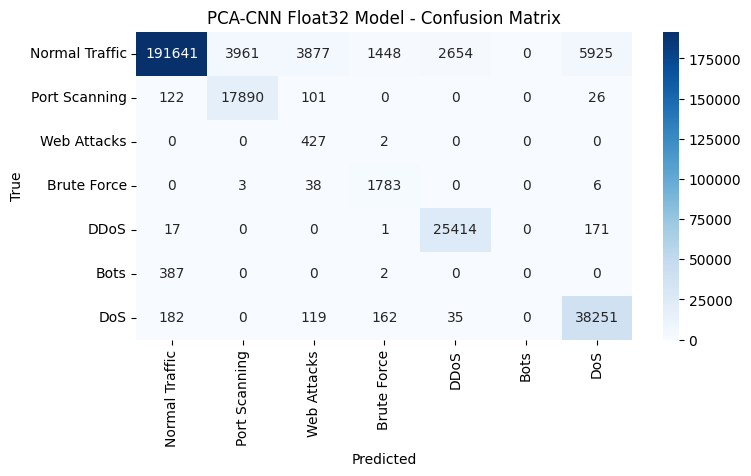

Accuracy: 0.9347044748765464
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       1.00      0.91      0.95    209506
 Port Scanning       0.82      0.99      0.89     18139
   Web Attacks       0.09      1.00      0.17       429
   Brute Force       0.52      0.97      0.68      1830
          DDoS       0.90      0.99      0.95     25603
          Bots       0.00      0.00      0.00       389
           DoS       0.86      0.99      0.92     38749

      accuracy                           0.93    294645
     macro avg       0.60      0.84      0.65    294645
  weighted avg       0.95      0.93      0.94    294645

Total Mal: 85139 & 85139
Total Malware Samples: 85139
Total Benign Samples: 209506
True Positives (Malware predicted as ANY malware): 84431 (99.17% of Malware Identified)
True Negatives (Benign predicted as Benign): 191641 (91.47% of Benign Identified)
False Positives (Benign predicted as Malware): 17865 (8.53% of Benign Miscla

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

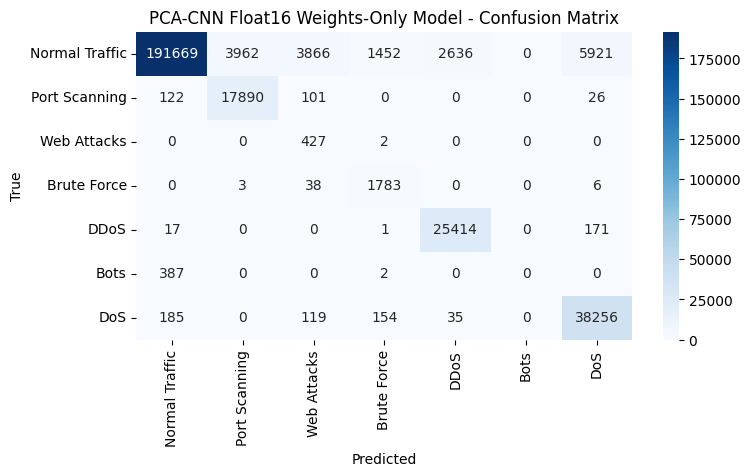

Accuracy: 0.9348164740620069
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       1.00      0.91      0.95    209506
 Port Scanning       0.82      0.99      0.89     18139
   Web Attacks       0.09      1.00      0.17       429
   Brute Force       0.53      0.97      0.68      1830
          DDoS       0.90      0.99      0.95     25603
          Bots       0.00      0.00      0.00       389
           DoS       0.86      0.99      0.92     38749

      accuracy                           0.93    294645
     macro avg       0.60      0.84      0.65    294645
  weighted avg       0.95      0.93      0.94    294645

Total Mal: 85139 & 85139
Total Malware Samples: 85139
Total Benign Samples: 209506
True Positives (Malware predicted as ANY malware): 84428 (99.16% of Malware Identified)
True Negatives (Benign predicted as Benign): 191669 (91.49% of Benign Identified)
False Positives (Benign predicted as Malware): 17837 (8.51% of Benign Miscla

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

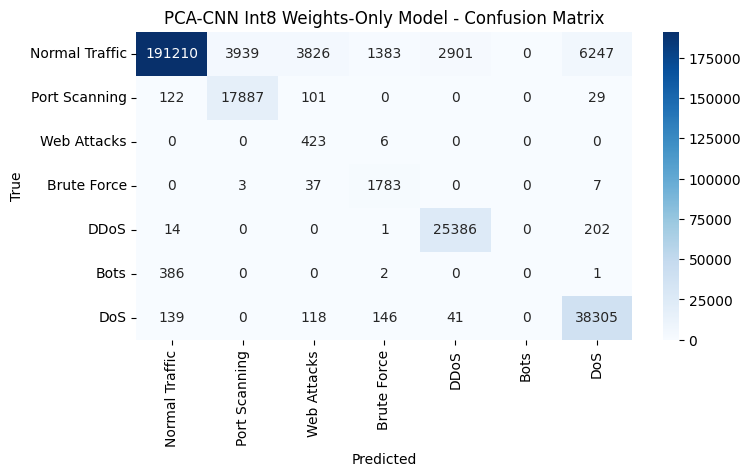

Accuracy: 0.933306182015646
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       1.00      0.91      0.95    209506
 Port Scanning       0.82      0.99      0.90     18139
   Web Attacks       0.09      0.99      0.17       429
   Brute Force       0.54      0.97      0.69      1830
          DDoS       0.90      0.99      0.94     25603
          Bots       0.00      0.00      0.00       389
           DoS       0.86      0.99      0.92     38749

      accuracy                           0.93    294645
     macro avg       0.60      0.83      0.65    294645
  weighted avg       0.95      0.93      0.94    294645

Total Mal: 85139 & 85139
Total Malware Samples: 85139
Total Benign Samples: 209506
True Positives (Malware predicted as ANY malware): 84478 (99.22% of Malware Identified)
True Negatives (Benign predicted as Benign): 191210 (91.27% of Benign Identified)
False Positives (Benign predicted as Malware): 18296 (8.73% of Benign Misclas

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

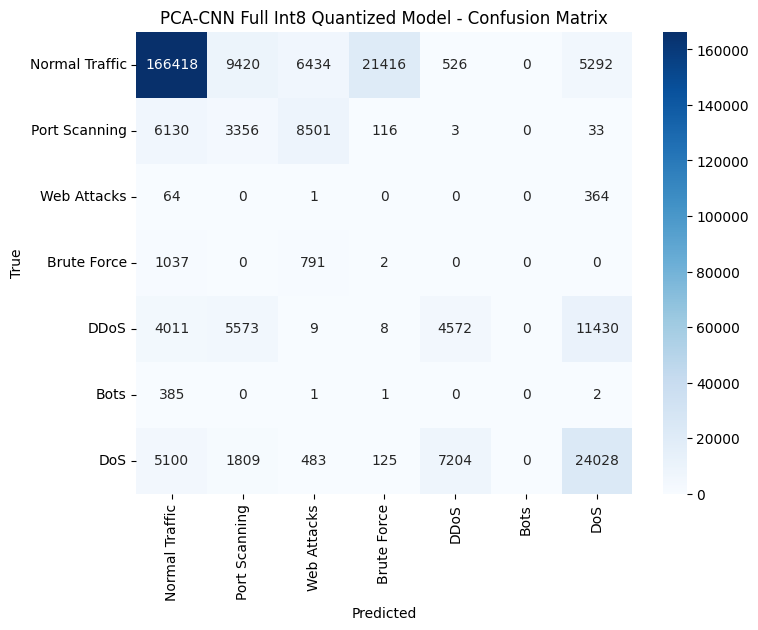

Accuracy: 0.6732746186088343
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       0.91      0.79      0.85    209506
 Port Scanning       0.17      0.19      0.18     18139
   Web Attacks       0.00      0.00      0.00       429
   Brute Force       0.00      0.00      0.00      1830
          DDoS       0.37      0.18      0.24     25603
          Bots       0.00      0.00      0.00       389
           DoS       0.58      0.62      0.60     38749

      accuracy                           0.67    294645
     macro avg       0.29      0.25      0.27    294645
  weighted avg       0.77      0.67      0.71    294645

Total Malware Samples: 85139
Total Benign Samples: 209506

TP, TN, FP, FN for Malware vs Benign:
True Positives (Malware predicted as ANY malware): 68412 (80.35% of Malware Identified)
True Negatives (Benign predicted as Benign): 166418 (79.43% of Benign Identified)
False Positives (Benign predicted as Malware): 43088 (20.57% o

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [ ]:
# Evaluate Quant Models
# -----------------------------------
# --- Make Quant Models -------------
# -----------------------------------
quantModel_f32, quantModel_int8_weights, quantModel_fp16_weights, quantModel_full_int8 = quant_models(pca_cnn, y_train_no_Bots, X_train_no_Bots)

# List of TFLite models (AE + MLP)
tflite_weight_models = [
    {
        "model": quantModel_f32,
        "name": "PCA-CNN Float32 Model",
    },
    {
        "model": quantModel_fp16_weights,
        "name": "PCA-CNN Float16 Weights-Only Model",
    },
    {
        "model": quantModel_int8_weights,
        "name": "PCA-CNN Int8 Weights-Only Model",
    }
]
# -----------------------------------
# --- evaluate_weight_quant_model ---
# -----------------------------------
evaluate_weight_quant_model(tflite_weight_models)

tflite_full_int_models = [
    {
        "model": quantModel_full_int8,
        "name": "PCA-CNN Full Int8 Quantized Model"
    }
]

# --------------------------------------
# --- evaluate_full_int8_quant_model ---
# --------------------------------------
evaluate_full_int8_quant_model(tflite_full_int_models)